In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!git clone -l -s git://github.com/tusharnandy/MLProjects.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 6.03 MiB | 4.30 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/cloned-repo
data_cleaned.csv  master.csv  README.md  RecEng  SelfProject-PGAdmissions.pdf


In [3]:
df = pd.read_csv('master.csv')

In [4]:
df.head(20)

country  year  ... gdp_per_capita ($)       generation
0   Albania  1987  ...                796     Generation X
1   Albania  1987  ...                796           Silent
2   Albania  1987  ...                796     Generation X
3   Albania  1987  ...                796  G.I. Generation
4   Albania  1987  ...                796          Boomers
5   Albania  1987  ...                796  G.I. Generation
6   Albania  1987  ...                796           Silent
7   Albania  1987  ...                796          Boomers
8   Albania  1987  ...                796  G.I. Generation
9   Albania  1987  ...                796     Generation X
10  Albania  1987  ...                796  G.I. Generation
11  Albania  1987  ...                796     Generation X
12  Albania  1988  ...                769  G.I. Generation
13  Albania  1988  ...                769     Generation X
14  Albania  1988  ...                769  G.I. Generation
15  Albania  1988  ...                769           Silent
16  Albania  1988  ...                769  G.I. Generation
17  Albania  1988  ...                769     Generation X
18  Albania  1988  ...                769  G.I. Generation
19  Albania  1988  ...                769          Boomers

[20 rows x 12 columns]

### Part1

In [5]:
df_ = df[['country', 'year', 'population']].groupby(['country', 'year']).agg('sum')
# For each pair of (country, year) there are several categories. The total population for a given such pair is the sum over all these categories
df_

population
country    year            
Albania    1987     2709600
           1988     2764300
           1989     2803100
           1992     2822500
           1993     2807300
...                     ...
Uzbekistan 2010    25651783
           2011    25978049
           2012    26381830
           2013    26838924
           2014    27313507

[2321 rows x 1 columns]

In [6]:
# Resetting the index and converting country-year pair from index to proper columns
country = []
year = []

for i in df_.index.tolist():
  country.append(i[0])
  year.append(i[1])

df_['country'] = country
df_['year'] = year

df_.index = list(range(0, len(df_.index.tolist())))

In [7]:
df_ = df_[['country', 'year', 'population']]
df_

country  year  population
0        Albania  1987     2709600
1        Albania  1988     2764300
2        Albania  1989     2803100
3        Albania  1992     2822500
4        Albania  1993     2807300
...          ...   ...         ...
2316  Uzbekistan  2010    25651783
2317  Uzbekistan  2011    25978049
2318  Uzbekistan  2012    26381830
2319  Uzbekistan  2013    26838924
2320  Uzbekistan  2014    27313507

[2321 rows x 3 columns]

In [8]:
country_avg_population = df_[['country', 'population']].groupby('country').agg('mean').sort_values('population', ascending=False)
# For each country, we take the average over all years and sort them

In [9]:
top_countries = country_avg_population.index.tolist()

In [10]:
# taking the range of years of USA as a refernce, we select those countries which have the same range 
years0 = sorted(df.loc[df['country'] == top_countries[0]]['year'].unique().tolist())
same_years = []

for i in range(0, len(top_countries)):
  current_years = sorted(df.loc[df['country'] == top_countries[i]]['year'].unique().tolist())

  if current_years == years0:
    same_years.append(top_countries[i])

In [11]:
top6 = same_years[:6]
top6
# So the top 6 countries based on avg population over the same number of years are:

['United States', 'Brazil', 'Japan', 'Mexico', 'United Kingdom', 'Italy']

In [12]:
# For convenience, I have collected the data of suicides per 100k for these 6 countries in a dataframe
suicidesper100k_top6 = {}
for country in top6:
  df_temp = df[df['country'] == country][['year', 'population', 'suicides_no']].groupby('year').agg('sum') # creating a temp
  
  # Since, for each year, we have summed the data over all categories, it would be fundmentally wrong to 
  # add the suicides/100k pop. We will have to compute this data explicitly

  df_temp['suicides per 100k'] = df_temp['suicides_no']/df_temp['population']*100_000
  suicidesper100k_top6[country] = df_temp['suicides per 100k']

In [13]:
suicidesper100k_top6 = pd.DataFrame(suicidesper100k_top6)
suicidesper100k_top6

United States    Brazil      Japan    Mexico  United Kingdom     Italy
year                                                                        
1985      13.340703  3.598944  20.616226  2.285173        9.630888  8.794283
1986      13.855835  3.595832  22.417509  2.479620        9.109643  8.644216
1987      13.672340  3.803864  20.681548  2.503381        8.628904  8.297795
1988      13.365999  3.552867  19.700958  2.445223        9.324568  8.026794
1989      13.167630  3.471252  18.151271  2.613546        8.162825  7.938249
1990      13.435401  3.655597  17.205814  2.635580        8.669130  8.028203
1991      13.217145  3.839685  16.934642  2.811636        8.435456  8.175818
1992      12.935250  3.800535  17.693140  2.971344        8.558269  8.388900
1993      13.055441  3.945121  17.287128  3.048415        8.219736  8.675572
1994      12.934820  4.146610  17.570131  3.302111        8.037096  8.377807
1995      12.860446  4.514324  17.954448  3.599530        7.881716  8.439049
1996      12.552551  4.545543  18.493076  3.589401        7.571047  8.659227
1997      12.281155  4.596064  19.553166  3.925434        7.496385  8.663477
1998      12.158396  4.538293  26.360422  3.814540        7.904209  8.302214
1999      11.500750  4.194761  26.028944  3.769033        7.966566  7.580988
2000      11.189108  4.288088  25.042450  3.853066        7.642439  7.565524
2001      11.531207  4.813371  24.263322  4.129476        7.428202  7.417108
2002      11.774465  4.729008  24.723560  4.140947        7.363759  7.462380
2003      11.613350  4.739508  26.480336  4.340923        7.083629  7.417510
2004      11.853026  4.759125  24.924481  4.260814        7.409440  7.248834
2005      11.817534  5.002817  25.169590  4.418484        7.123868  6.773502
2006      11.933436  4.982231  24.663220  4.295775        7.220036  6.585895
2007      12.326720  5.051537  25.405123  4.272426        6.791239  6.639736
2008      12.760506  5.174912  24.935739  4.543382        7.383410  6.847942
2009      12.939983  5.204669  25.331131  4.827749        7.318979  6.929160
2010      13.327582  5.191331  24.281073  4.588392        7.170800  6.920800
2011      13.608722  5.348029  23.787905  5.162784        7.460703  7.336140
2012      13.863470  5.547138  21.814718  4.920052        7.442810  7.495367
2013      13.931532  5.608164  21.566789  5.143344        8.027719  7.460437
2014      14.364077  5.616382  20.251260  5.482171        7.904841  7.137611
2015      14.725813  5.841839  19.183176  5.451308        8.038251  6.861937

In [14]:
for country in suicidesper100k_top6.columns.tolist():
  print("\033[1m" + country + "\033[0m")
  print(f"mean: {suicidesper100k_top6[country].mean()}") 
  print(f"sample variance: {suicidesper100k_top6[country].var()}\n")

United States
mean: 12.835303001368596
sample variance: 0.8239933076863551

Brazil
mean: 4.570885198723901
sample variance: 0.4906997714491626

Japan
mean: 21.886203187001176
sample variance: 10.697810293442645

Mexico
mean: 3.858872958958654
sample variance: 0.9025298500567935

United Kingdom
mean: 7.88408269143015
sample variance: 0.4713653853878044

Italy
mean: 7.712660437386648
sample variance: 0.4811862715796395



### Part 2

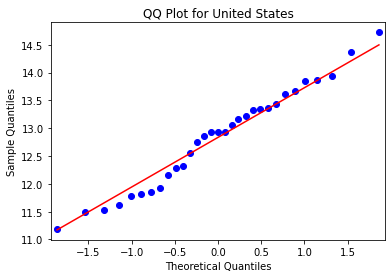

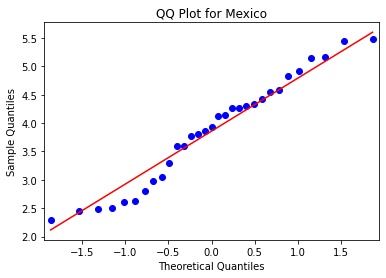

In [15]:
for country in suicidesper100k_top6.columns.tolist():
  sm.qqplot(suicidesper100k_top6[country], line='s');
  plt.title(f'QQ Plot for {country}')
  plt.show()

### Part 3

In [16]:
def GLL(pandas_series):
  mu = pandas_series.mean()
  sigma = np.sqrt(pandas_series.var()) # sample variance
  g = lambda x: np.exp((-1 * (x-mu)**2)/(2*(sigma**2)))/(sigma*np.sqrt(2*np.pi))
  gaussian_estimates = g(pandas_series)
  log_estimates = np.log(gaussian_estimates)
  log_likelihood = log_estimates.sum()
  return log_likelihood  

In [17]:
for country in suicidesper100k_top6:
  print("\033[1m" + country + "\033[0m")
  print(f"Log Likelihood: {GLL(suicidesper100k_top6[country])}\n")

United States
Log Likelihood: -40.48640503123949

Brazil
Log Likelihood: -32.452291103749864

Japan
Log Likelihood: -80.22270019265814

Mexico
Log Likelihood: -41.89751505510806

United Kingdom
Log Likelihood: -31.829207860643123

Italy
Log Likelihood: -32.14883174431772



All countries except Japan have log-likelihood in the range of -30 to -40. These countries 'somewhat' seem to follow the trend-line, although not too well.

The shape of Japan's graph resembles a sigmoid and deviates more from the trend-line than others. This is visible from it's low likelihood value.

We can also compare their distributions using the violinplots, and plugging in the values in a gaussian pdf, using the means and variances as $\mu$ and $\sigma$, respectively.

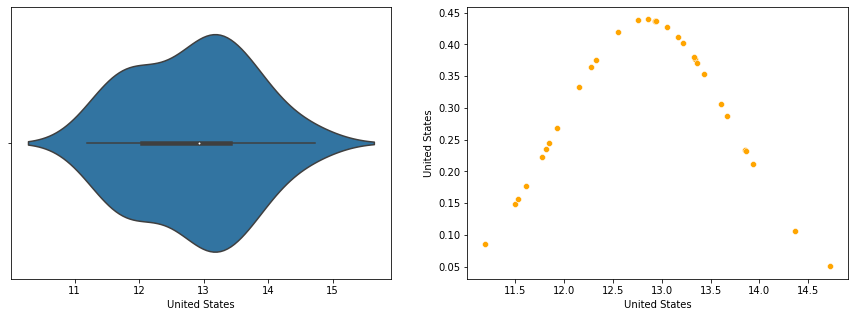

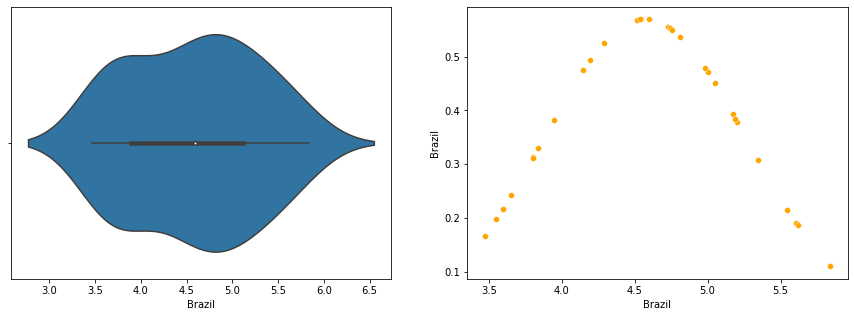

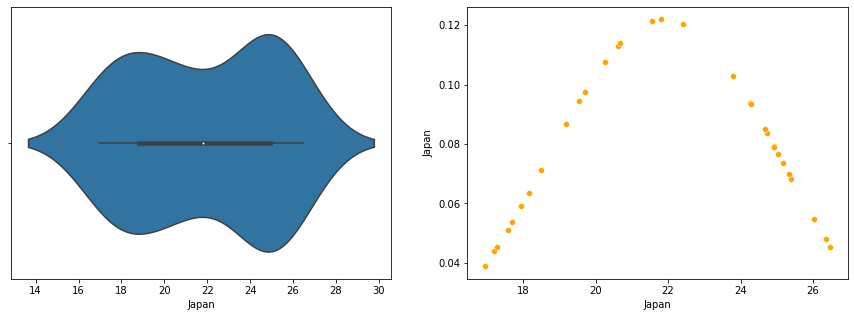

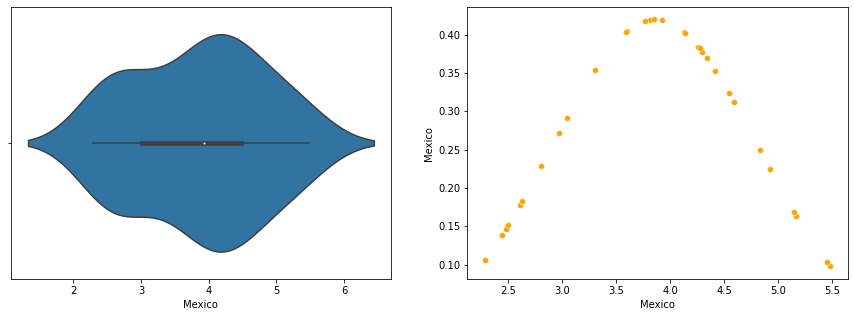

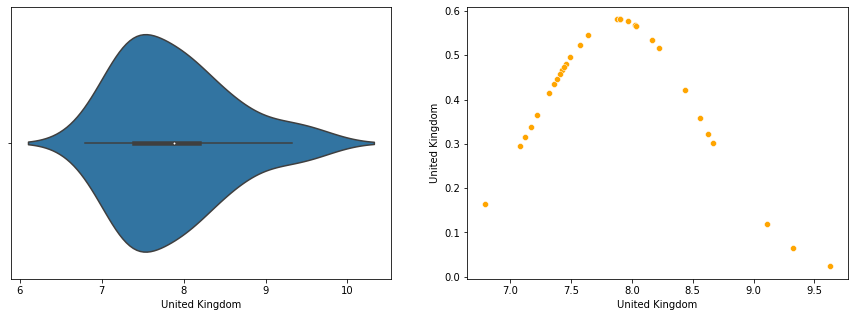

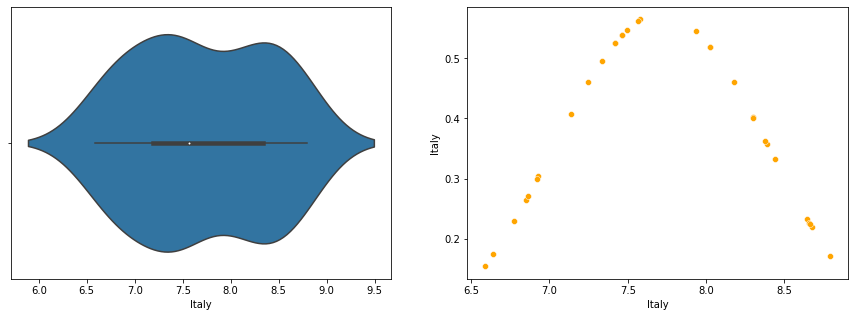

In [18]:
for country in suicidesper100k_top6:
  fig, ax =plt.subplots(1,2)
  
  sns.violinplot(x = suicidesper100k_top6[country], ax=ax[0])
  
  mu = suicidesper100k_top6[country].mean()
  sigma = np.sqrt(suicidesper100k_top6[country].var()) # sample standard deviation
  g = lambda x: np.exp((-1 * (x-mu)**2)/(2*(sigma**2)))/(sigma*np.sqrt(2*np.pi))
  gaussian_estimates = g(suicidesper100k_top6[country])

  sns.scatterplot(x=suicidesper100k_top6[country], y=gaussian_estimates, color='orange', ax=ax[1])
  fig.set_figwidth(15)
  fig.set_figheight(5)
  fig.show()

### Part 4
In this part,we have to calculate the 95% confidence interval. This is given by:

$$\bar{X} \pm \frac{Z_{0.95}*s}{\sqrt{N}}$$

- Where $Z_{0.95}$ is the Z-value corresponding to 95% C.I. which is 1.960
- s is the standard deviation
- N is the sample size

In [19]:
def CI95(data):
  sigma = np.sqrt(data.var())
  N = len(data)
  Z = 1.96
  val = Z*sigma/np.sqrt(N)
  return val

In [20]:
for country in suicidesper100k_top6:
  length = CI95(suicidesper100k_top6[country])
  mu = suicidesper100k_top6[country].mean()
  print("\033[1m" + country + "\033[0m")
  print(f"95% CI: {mu} +/- {length}\n")

United States
95% CI: 12.835303001368596 +/- 0.319548708529444

Brazil
95% CI: 4.570885198723901 +/- 0.24659436733220624

Japan
95% CI: 21.886203187001176 +/- 1.1513905761364311

Mexico
95% CI: 3.858872958958654 +/- 0.33443060285854276

United Kingdom
95% CI: 7.88408269143015 +/- 0.24168743240817828

Italy
95% CI: 7.712660437386648 +/- 0.2441922286748134



### Part 5
The countries with the closest mean are:   

**United Kingdom**   
mean: 7.88408269143015   
sample variance: 0.4713653853878044   

**Italy**   
mean: 7.712660437386648  
sample variance: 0.4811862715796395

#### Part 5.1
Welch T-test

$$t = \frac{\bar{\mu_1} - \bar{\mu_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}}$$

After calculating the t-value, we can generate the corresponding p-value. This would require us to calcuate the Degrees of Freedom, but I have directly used the scipy package here.

If the p-value is greater than this critical value ($\alpha = 0.05$), we can not reject the null hypothesis.

In [24]:
from scipy import stats

In [25]:
# I have used a scipy package to calculate the t-value and the p-value both
x = np.array(suicidesper100k_top6['United Kingdom'].tolist())
y = np.array(suicidesper100k_top6['Italy'].tolist())
t,p = stats.ttest_ind(x,y,equal_var=False)
print(t)
print(p)

0.9779210170187137
0.3320404268870718


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


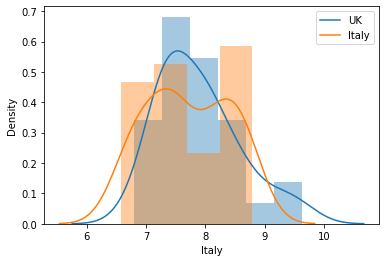

In [26]:
sns.distplot(suicidesper100k_top6['United Kingdom'])
sns.distplot(suicidesper100k_top6['Italy'])
plt.legend(['UK', "Italy"])
plt.show()

**Conclusion**

As it is clear from the p-value as well as the distributions, we can not reject the null hypothesis. Hence, the mean suicide rates don't differ from each other. 

#### Part 5.2
Wilcoxon signed rank test. 

It is a non-parametric test, which is less powerful because it does not assume any particular distribution and is more generic.

The algorithm is quite elaborate to be written. Refer: https://en.wikipedia.org/wiki/Wilcoxon_signed-rank_test

We will use the same significance level $\alpha=0.05$.

In [27]:
w,p = stats.wilcoxon(x,y)
print(f"Test statistic: {w}")
print(f"p-value: {p}")

Test statistic: 149.0
p-value: 0.05237264648396437


**Conclusion**

We see that the p-value is narrowly larger than the significance level. Hence, we can not reject the null hypothesis, and therefore, conclude that the means belong to the same distribution. 

### Part 6 
We need to perform a paired t-test here $\,$

The process is as follows:   
1. calculate the mean of difference 

    1. Since Expectation is a linear operator:
    2. $E(x - y) = \mu_{diff} = \mu_x - \mu_y$
2. then we calculate the estimated standard error of the mean

    $$\large s_{\bar{x}} = \frac{s_{\small diff}}{\small \sqrt{n}}$$

3. the 't' value is then:
    $$t = \frac{\mu_{diff}}{\large s_{\bar{x}}}$$

In [28]:
dbar = (y-x).mean()
s_d = np.sqrt((y-x).var())

t = dbar*np.sqrt(len(x))/s_d

In [29]:
t

-1.7370516605835247

**Conclusion**

We are interested in a two-tailed test with significance level $\alpha=0.05$. The corresponding value from the t-table for the given alpha is $t_{0.95} \approx 2.00$. 

We reject the null hypothesis when $\lvert t \rvert > t_{1-\alpha}$.

Since this isn't the case here, we can not reject the null hypothesis. Hence, the two means seem to come from the same distribution.

### Part 7
Since we had to use one number per year for the suicide rates, I have chosen males in the age group 25-34 years

#### Part 7.1
Comparison with HDI*


*$\small \text{The HDI values do not exist for all years}$

In [30]:
# The HDI column has a lot of NaN values. We need to drop those first
dfr = df.dropna() # since HDI is the only column with NaN values, we do not need to mention anything explicitly
dfr # 'r' for reduced

country  year  ... gdp_per_capita ($)       generation
72        Albania  1995  ...                835     Generation X
73        Albania  1995  ...                835           Silent
74        Albania  1995  ...                835  G.I. Generation
75        Albania  1995  ...                835     Generation X
76        Albania  1995  ...                835     Generation X
...           ...   ...  ...                ...              ...
27815  Uzbekistan  2014  ...               2309     Generation X
27816  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z
27818  Uzbekistan  2014  ...               2309     Generation Z
27819  Uzbekistan  2014  ...               2309          Boomers

[8364 rows x 12 columns]

In [31]:
dfr_m = dfr[dfr['sex'] == 'male']
dfr_m

country  year  ... gdp_per_capita ($)       generation
72        Albania  1995  ...                835     Generation X
73        Albania  1995  ...                835           Silent
76        Albania  1995  ...                835     Generation X
77        Albania  1995  ...                835  G.I. Generation
78        Albania  1995  ...                835          Boomers
...           ...   ...  ...                ...              ...
27809  Uzbekistan  2014  ...               2309       Millenials
27811  Uzbekistan  2014  ...               2309          Boomers
27812  Uzbekistan  2014  ...               2309       Millenials
27813  Uzbekistan  2014  ...               2309           Silent
27817  Uzbekistan  2014  ...               2309     Generation Z

[4182 rows x 12 columns]

In [32]:
dfr_m_25_34 = dfr_m[dfr_m['age'] == '25-34 years']
dfr_m_25_34.reset_index(drop=True, inplace=True)
dfr_m_25_34

country  year  ... gdp_per_capita ($)    generation
0                Albania  1995  ...                835  Generation X
1                Albania  2000  ...               1299  Generation X
2                Albania  2005  ...               2931  Generation X
3                Albania  2010  ...               4359  Generation X
4    Antigua and Barbuda  2012  ...              13657    Millenials
..                   ...   ...  ...                ...           ...
692           Uzbekistan  2010  ...               1533  Generation X
693           Uzbekistan  2011  ...               1767    Millenials
694           Uzbekistan  2012  ...               1964    Millenials
695           Uzbekistan  2013  ...               2150    Millenials
696           Uzbekistan  2014  ...               2309    Millenials

[697 rows x 12 columns]

In [33]:
y = dfr_m_25_34['suicides/100k pop']
x = dfr_m_25_34['HDI for year']

In [34]:
np.corrcoef(x,y)[0,1]

0.04160913276855811

The correlation coefficient is quite low.

In [35]:
plt.figure(figsize=(7,7))
plt.scatter(x,y)
plt.xlabel('HDI for year')
plt.ylabel("suicides per 100k")
plt.title("HDI v/s Suicides per 100k for male b/w 25-34 years");

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()
X = dfr_m_25_34[['HDI for year']]
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_hat = lr.predict(X)

In [39]:
plt.figure(figsize=(7,7))
plt.scatter(x,y, label='Original Data')
plt.plot(x, y_hat, color='red', label='Linear Regression')
plt.xlabel('HDI for year')
plt.ylabel("suicides per 100k")
plt.legend()
plt.title("HDI v/s Suicides per 100k for male b/w 25-34 years");

In [55]:
lr.score(X,y)

0.001731319929751285

In [56]:
corr1, p1 = stats.pearsonr(x,y)
print(p1)
print(corr1)

0.27263437837384724
0.04160913276855816


**Conclusion**

As you can see above that the p-value between the predicted value and original values is 0.273, which is greater than 0.05. 

The null hypothesis is that **y** w.r.t **x** has no particular trend, i.e. the original data has no linearity. Since the p-value is beyond the critical value, we can not reject the null hypothesis. 

Hence, the data has no linearity

#### Part 7.2
Comparison with GDP

In [57]:
df_m = df[df['sex'] == 'male']
df_m_25_34 = df_m[df_m['age'] == '25-34 years']
df_m_25_34

country  year  ... gdp_per_capita ($)    generation
4         Albania  1987  ...                796       Boomers
20        Albania  1988  ...                769       Boomers
25        Albania  1989  ...                833       Boomers
39        Albania  1992  ...                251       Boomers
51        Albania  1993  ...                437       Boomers
...           ...   ...  ...                ...           ...
27761  Uzbekistan  2010  ...               1533  Generation X
27773  Uzbekistan  2011  ...               1767    Millenials
27786  Uzbekistan  2012  ...               1964    Millenials
27797  Uzbekistan  2013  ...               2150    Millenials
27809  Uzbekistan  2014  ...               2309    Millenials

[2321 rows x 12 columns]

In [58]:
X2 = df_m_25_34[['suicides/100k pop']]
y2 = df_m_25_34['gdp_per_capita ($)']

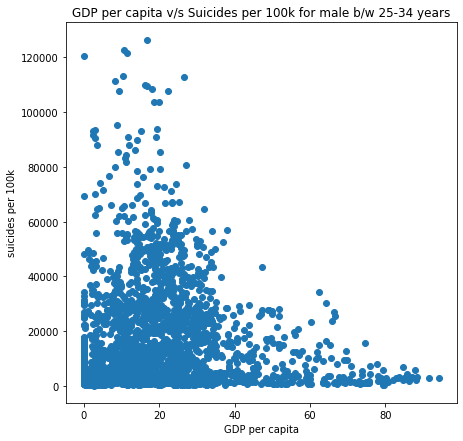

In [59]:
plt.figure(figsize=(7,7))
plt.scatter(X2,y2)
plt.xlabel('GDP per capita')
plt.ylabel("suicides per 100k")
plt.title("GDP per capita v/s Suicides per 100k for male b/w 25-34 years");

In [60]:
lr2 = LinearRegression()

In [61]:
lr2.fit(X2, y2)
y_hat2 = lr2.predict(X2)

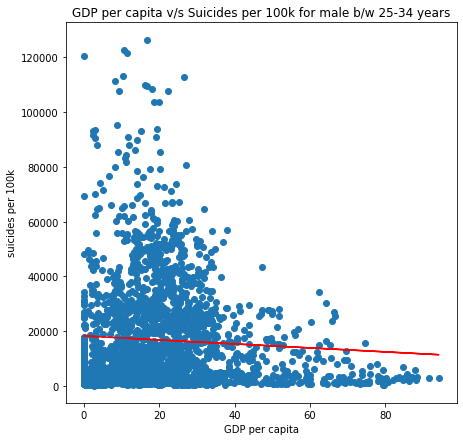

In [62]:
plt.figure(figsize=(7,7))
plt.scatter(X2,y2, label='original data')
plt.plot(X2, y_hat2, label='predicted values', color='red')
plt.xlabel('GDP per capita')
plt.ylabel("suicides per 100k")
plt.title("GDP per capita v/s Suicides per 100k for male b/w 25-34 years");

In [63]:
lr2.score(X2, y2)

0.0039207614669442

In [68]:
corr2, p2 = stats.pearsonr(X2['suicides/100k pop'], y2)
print(f"correlation: {corr2}")

correlation: -0.06261598411703041


As we can see that the correlation value, and correspondingly the r^2 (score as in above) is very low. This can also be seen from the scatter-plot.